In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import category_encoders as ce

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

import plotly.graph_objects as go
from nltk.corpus import stopwords

## Import data

In [11]:
df = pd.read_csv('Final_Balanced_Cleaned_Car Accident Dataset.csv')
df

,Day_of_Week,Junction_Control,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Hour,Minute,Accident_Severity
0,1,3,0.539929,4,321,0.388342,0.000000,0.000000,0,3,0.833333,0,1,0.260870,0.508475,3
1,1,4,0.090052,4,116,0.597126,0.000000,0.064516,4,3,0.833333,0,1,0.347826,0.813559,3
2,1,5,0.032547,4,88,0.262809,0.000000,0.000000,0,3,0.333333,1,1,0.478261,0.813559,3
3,3,5,0.337348,1,406,0.521226,0.000000,0.000000,2,3,0.333333,1,1,0.826087,0.440678,3
4,0,4,0.155597,1,160,0.794396,0.000000,0.032258,4,3,0.333333,1,3,0.826087,0.101695,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171011,5,3,0.237787,4,287,0.663465,0.021277,0.032258,4,3,0.333333,0,1,0.521739,0.677966,2
171012,0,4,0.168574,1,334,0.770316,0.000000,0.032258,0,4,1.000000,0,1,0.826087,0.491525,2
171013,4,5,0.361220,4,124,0.786760,0.000000,0.000000,0,3,0.833333,0,1,0.695652,0.593220,2
171014,3,5,0.178027,1,143,0.541700,0.000000,0.032258,4,3,0.333333,0,1,0.869565,0.169492,2


## Slice data

In [12]:
# Train/Validation - Test split
X = df.drop('Accident_Severity', axis=1)  
y = df['Accident_Severity']
# y_discrete = pd.cut(y, bins=5, labels=False) 

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
print(y.dtypes)
print(y.head())


int64
0    3
1    3
2    3
3    3
4    3
Name: Accident_Severity, dtype: int64


## Built and predict - Gaussian Naive Bayes

In [14]:
from datetime import timedelta
import time
gnb_start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_end_time = time.time()
gnb_time = gnb_end_time - gnb_start_time
print("Train score:", gnb.score(X_train, y_train))
print("Validation score:", gnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(gnb_time,4)))


Train score: 0.538739130071589
Validation score: 0.5373160510671474
Time is:  0:00:00.049800


In [15]:
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

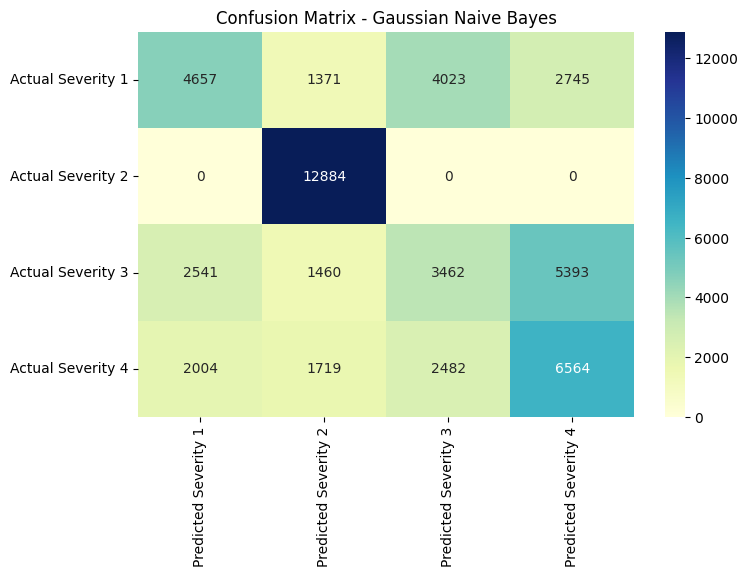

In [16]:
y_pred = gnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

## Algorithms Evaluation - Gaussian Naive Bayes

In [17]:
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42     29958
           1       0.74      1.00      0.85     29870
           2       0.35      0.28      0.31     29898
           3       0.45      0.52      0.48     29985

    accuracy                           0.54    119711
   macro avg       0.51      0.54      0.52    119711
weighted avg       0.51      0.54      0.52    119711



In [18]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42     12796
           1       0.74      1.00      0.85     12884
           2       0.35      0.27      0.30     12856
           3       0.45      0.51      0.48     12769

    accuracy                           0.54     51305
   macro avg       0.51      0.54      0.51     51305
weighted avg       0.51      0.54      0.51     51305



### Accuracy -  Gaussian Naive Bayes

In [19]:
accuracy["Gaussian Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Gaussian Naive Bayes: ", accuracy["Gaussian Naive Bayes"])

Accuracy - Gaussian Naive Bayes:  0.5373160510671474


### F1-Score - Recall - Precision - Gaussian Naive Bayes

In [20]:
f1["Gaussian Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Gaussian Naive Bayes: ", f1["Gaussian Naive Bayes"])
print("precision - Gaussian Naive Bayes: ", precisionScore)
print("recall - Gaussian Naive Bayes: ", recallScore)

f1-Score - Gaussian Naive Bayes:  0.5136475516335506
precision - Gaussian Naive Bayes:  0.5097293651549666
recall - Gaussian Naive Bayes:  0.5368224858515072


Draw PR (Precision - Recall) Curve - Gaussian Naive Bayes

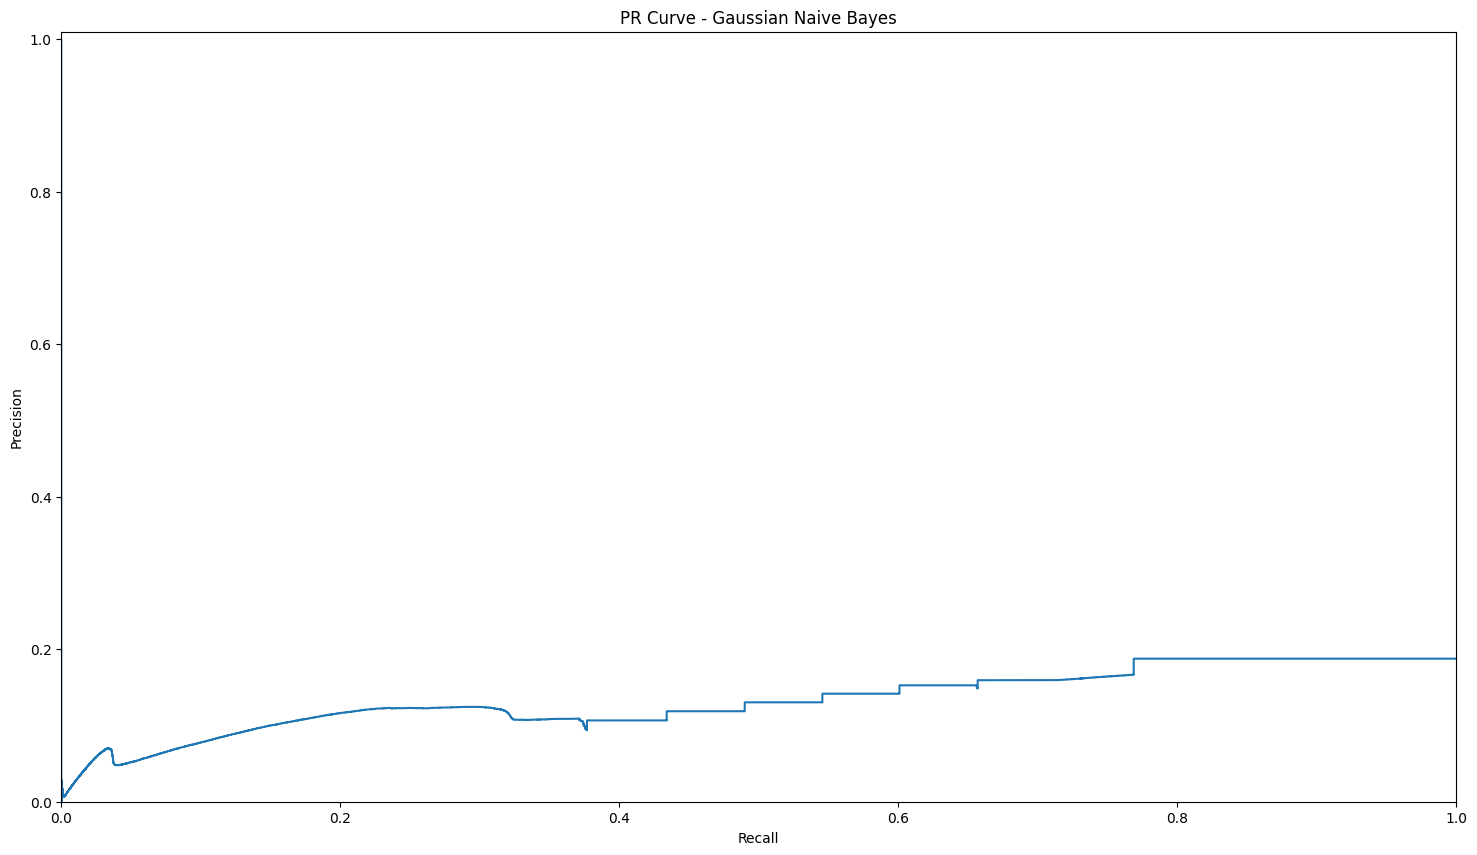

In [21]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = gnb.predict_proba(X_validate)

precision["Gaussian Naive Bayes"], recall["Gaussian Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Gaussian Naive Bayes"], precision["Gaussian Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Gaussian Naive Bayes")
plt.show()

### ROC curve - Gaussian Naive Bayes

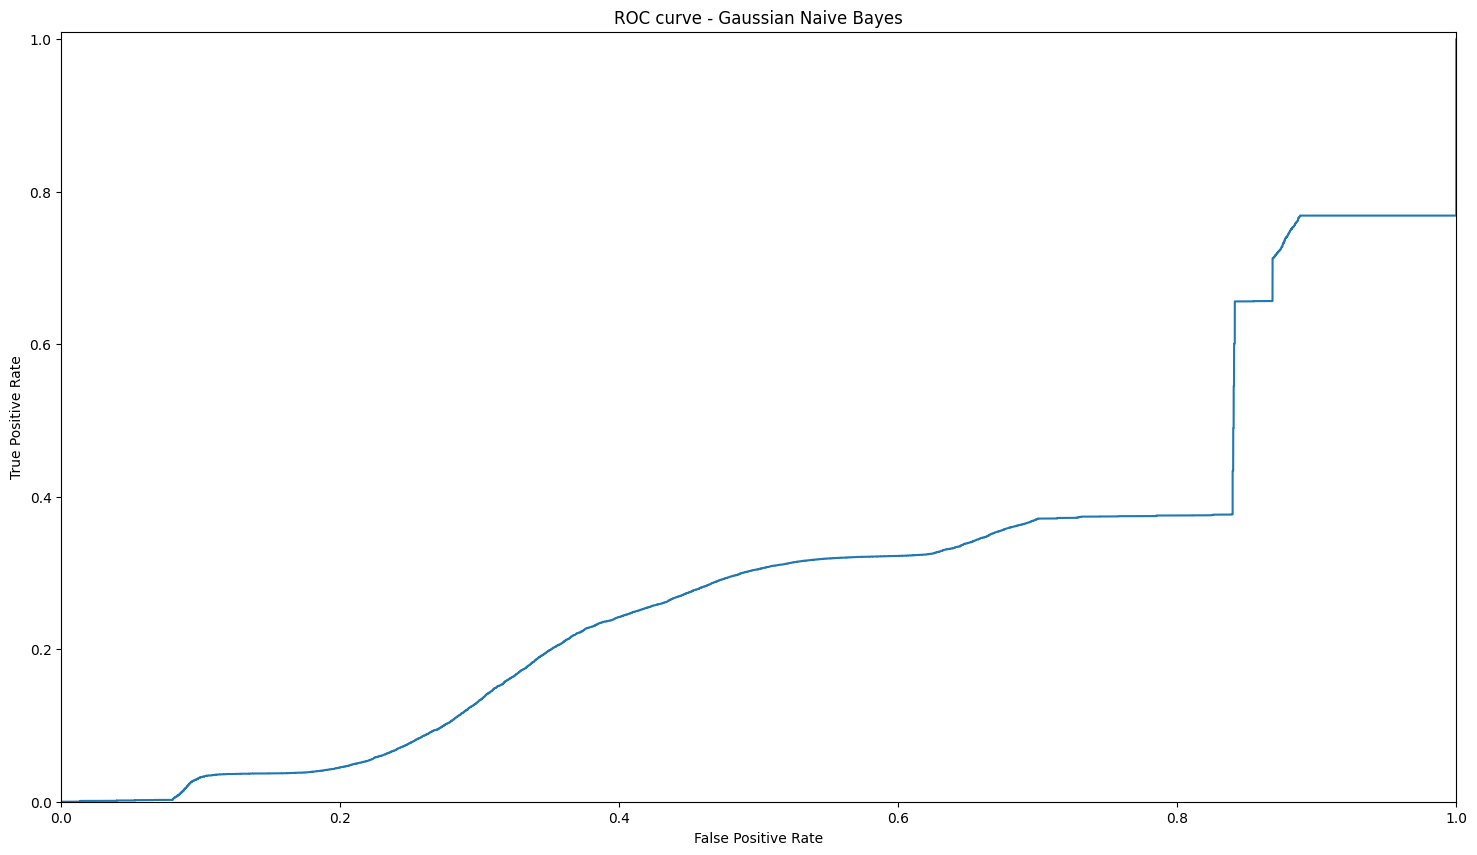

In [22]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = gnb.predict_proba(X_validate)

fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Gaussian Naive Bayes"], tpr["Gaussian Naive Bayes"], where="post")

plt.title("ROC curve - Gaussian Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Built and predict - Multinomial Naive Bayes

In [23]:
mnb_start_time = time.time()
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_end_time = time.time()
mnb_time = mnb_end_time - mnb_start_time

print("Train score:", mnb.score(X_train, y_train))
print("Validation score:", mnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(mnb_time,4)))

Train score: 0.3248323044665904
Validation score: 0.3260306013059156
Time is:  0:00:00.024300


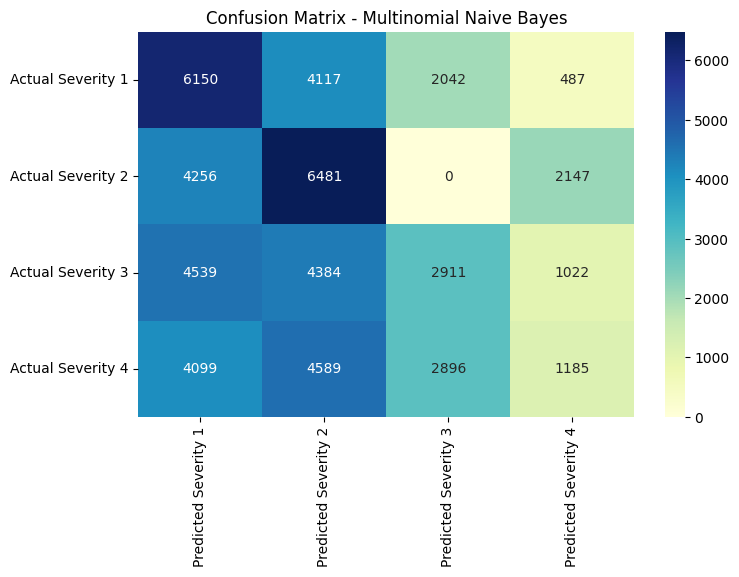

In [24]:
y_pred = mnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Multinomial Naive Bayes")
plt.show()

## Algorithms Evaluation - Multinomial Naive Bayes

In [25]:
print(classification_report(y_train, mnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.32      0.49      0.39     29958
           1       0.33      0.50      0.40     29870
           2       0.37      0.23      0.28     29898
           3       0.24      0.09      0.13     29985

    accuracy                           0.32    119711
   macro avg       0.32      0.32      0.30    119711
weighted avg       0.32      0.32      0.30    119711



In [26]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.48      0.39     12796
           1       0.33      0.50      0.40     12884
           2       0.37      0.23      0.28     12856
           3       0.24      0.09      0.13     12769

    accuracy                           0.33     51305
   macro avg       0.32      0.33      0.30     51305
weighted avg       0.32      0.33      0.30     51305



### Accuracy -  Multinomial Naive Bayes

In [27]:
accuracy["Multinomial Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Multinomial Naive Bayes: ", accuracy["Multinomial Naive Bayes"])

Accuracy - Multinomial Naive Bayes:  0.3260306013059156


### F1-Score - Recall - Precision - Multinomial Naive Bayes

In [28]:
f1["Multinomial Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Multinomial Naive Bayes: ", f1["Multinomial Naive Bayes"])
print("precision - Multinomial Naive Bayes: ", precisionScore)
print("recall - Multinomial Naive Bayes: ", recallScore)

f1-Score - Multinomial Naive Bayes:  0.3003652592791876
precision - Multinomial Naive Bayes:  0.317437250271129
recall - Multinomial Naive Bayes:  0.3257200184942938


Draw PR (Precision - Recall) Curve - Multinomial Naive Bayes

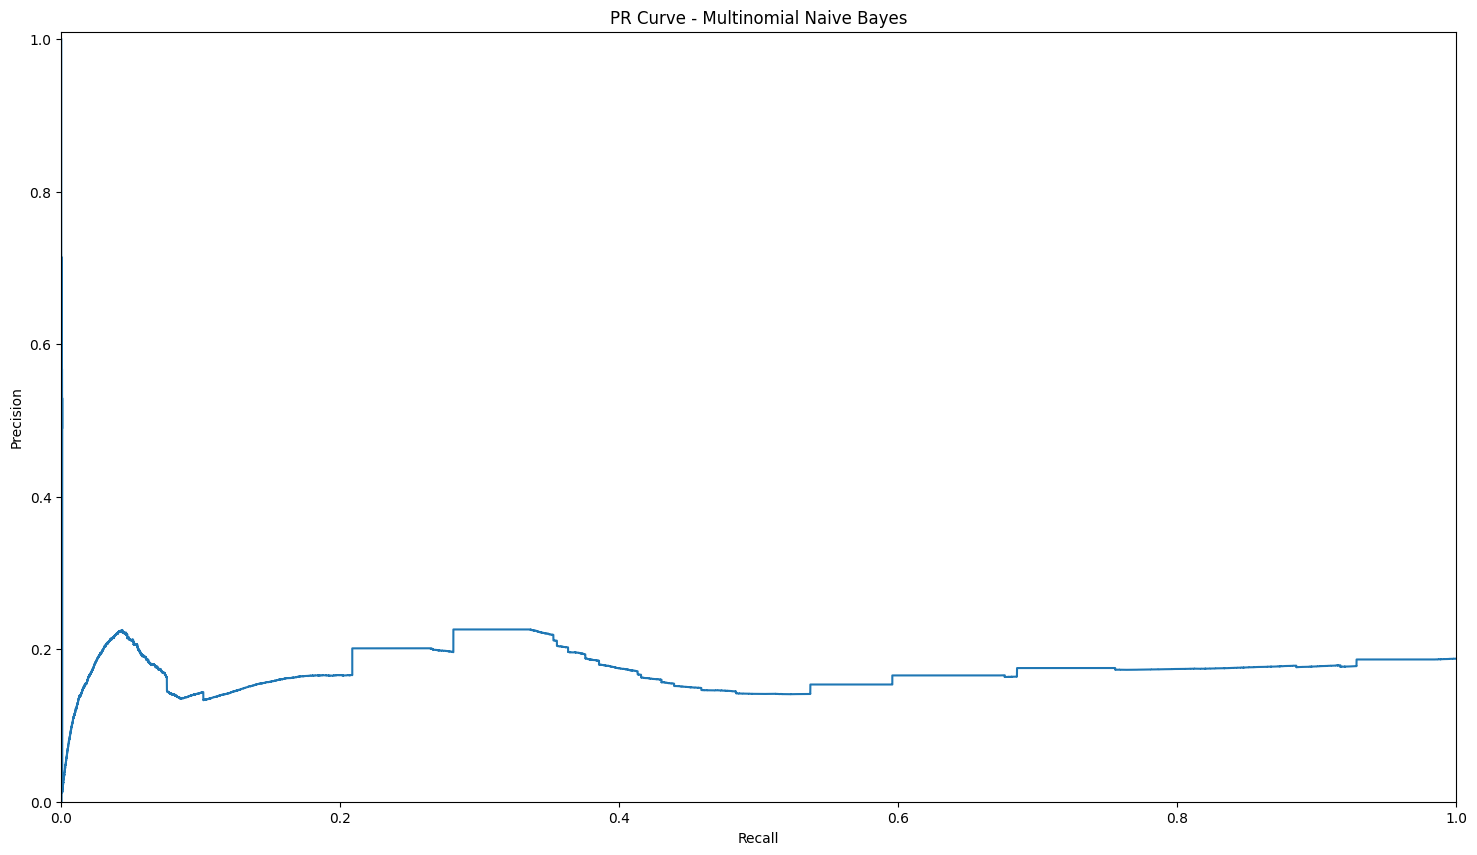

In [29]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = mnb.predict_proba(X_validate)

precision["Multinomial Naive Bayes"], recall["Multinomial Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Multinomial Naive Bayes"], precision["Multinomial Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Multinomial Naive Bayes")
plt.show()

### ROC curve - Multinomial Naive Bayes

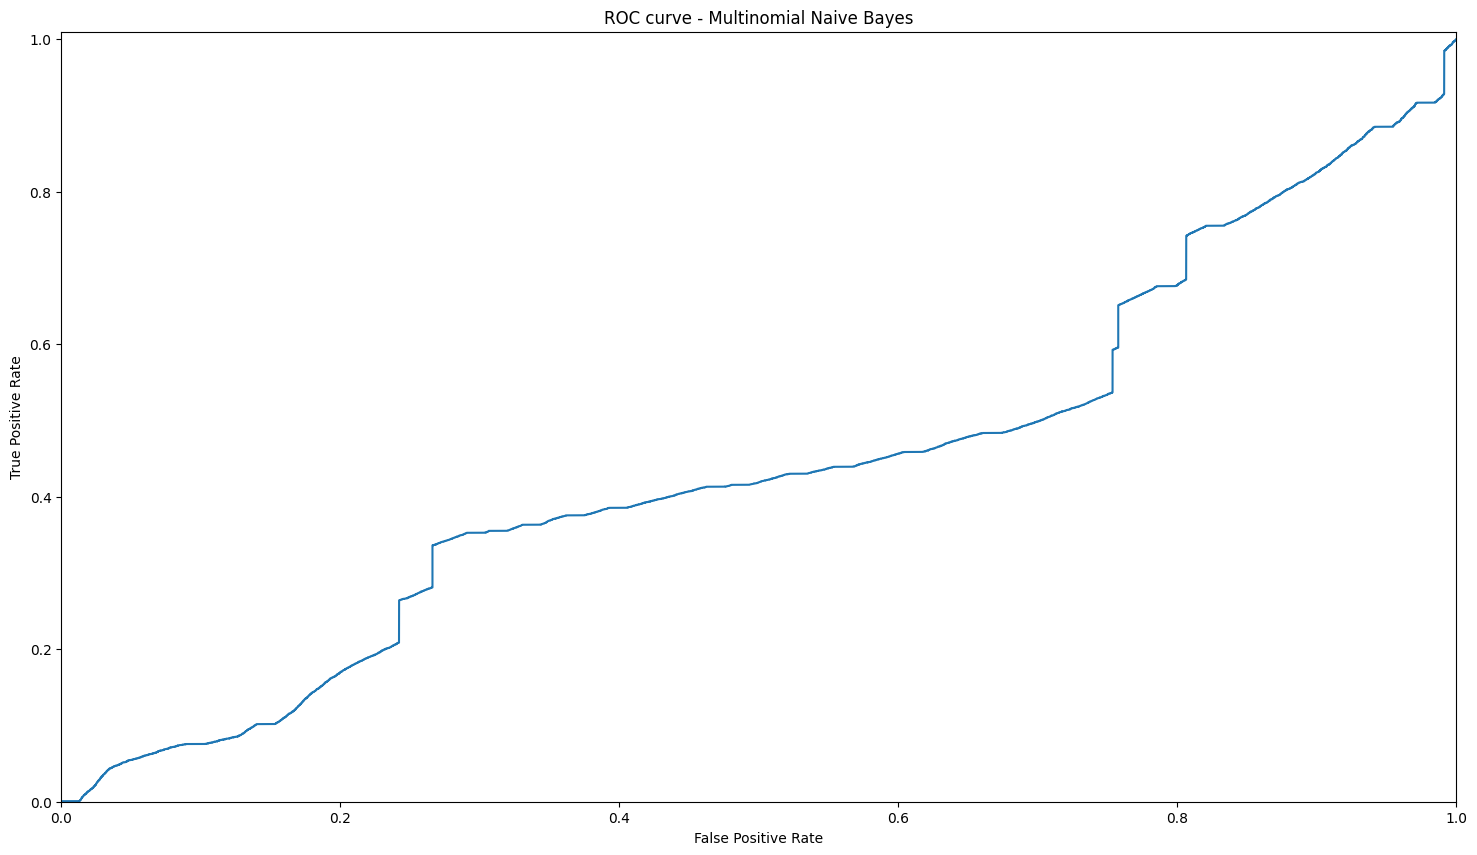

In [30]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = mnb.predict_proba(X_validate)

fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Multinomial Naive Bayes"], tpr["Multinomial Naive Bayes"], where="post")

plt.title("ROC curve - Multinomial Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()

## Built and predict - Bernoulli Naive Bayes

In [31]:
bnb_start_time = time.time()
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_end_time = time.time()
bnb_time = bnb_end_time - bnb_start_time
print("Train score:", bnb.score(X_train, y_train))
print("Validation score:", bnb.score(X_validate, y_validate))
print("Time is: ", timedelta(seconds=round(bnb_time,4)))

Train score: 0.4475361495601908
Validation score: 0.4478705779163824
Time is:  0:00:00.033100


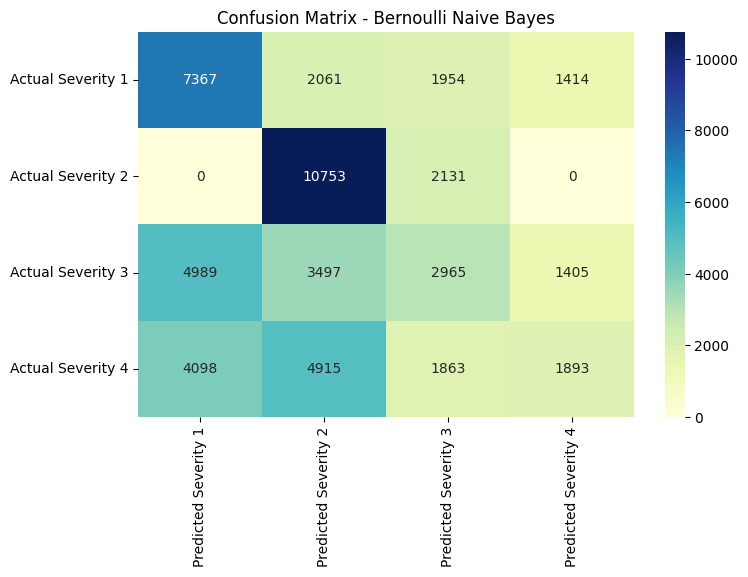

In [32]:
y_pred = bnb.predict(X_validate)
confmat = confusion_matrix(y_true=y_validate, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Bernoulli Naive Bayes")
plt.show()

## Algorithm Evaluation - Bernoulli Naive Bayes

In [33]:
print(classification_report(y_train, bnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.45      0.58      0.50     29958
           1       0.50      0.83      0.63     29870
           2       0.32      0.22      0.26     29898
           3       0.42      0.16      0.23     29985

    accuracy                           0.45    119711
   macro avg       0.42      0.45      0.41    119711
weighted avg       0.42      0.45      0.41    119711



In [34]:
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.58      0.50     12796
           1       0.51      0.83      0.63     12884
           2       0.33      0.23      0.27     12856
           3       0.40      0.15      0.22     12769

    accuracy                           0.45     51305
   macro avg       0.42      0.45      0.41     51305
weighted avg       0.42      0.45      0.41     51305



### Accuracy -  Bernoulli Naive Bayes

In [35]:
accuracy["Bernoulli Naive Bayes"] = accuracy_score(y_validate, y_pred)
print("Accuracy - Bernoulli Naive Bayes: ", accuracy["Bernoulli Naive Bayes"])

Accuracy - Bernoulli Naive Bayes:  0.4478705779163824


### F1-Score - Recall - Precision - Bernoulli Naive Bayes

In [36]:
f1["Bernoulli Naive Bayes"] = f1_score(y_validate, y_pred, average="macro")
precisionScore = precision_score(y_validate, y_pred, average="macro")
recallScore = recall_score(y_validate, y_pred, average="macro")
print("f1-Score - Bernoulli Naive Bayes: ", f1["Bernoulli Naive Bayes"])
print("precision - Bernoulli Naive Bayes: ", precisionScore)
print("recall - Bernoulli Naive Bayes: ", recallScore)

f1-Score - Bernoulli Naive Bayes:  0.4057999504349717
precision - Bernoulli Naive Bayes:  0.42218228889280907
recall - Bernoulli Naive Bayes:  0.4473022810140094


Draw PR (Precision - Recall) Curve - Bernoulli Naive Bayes

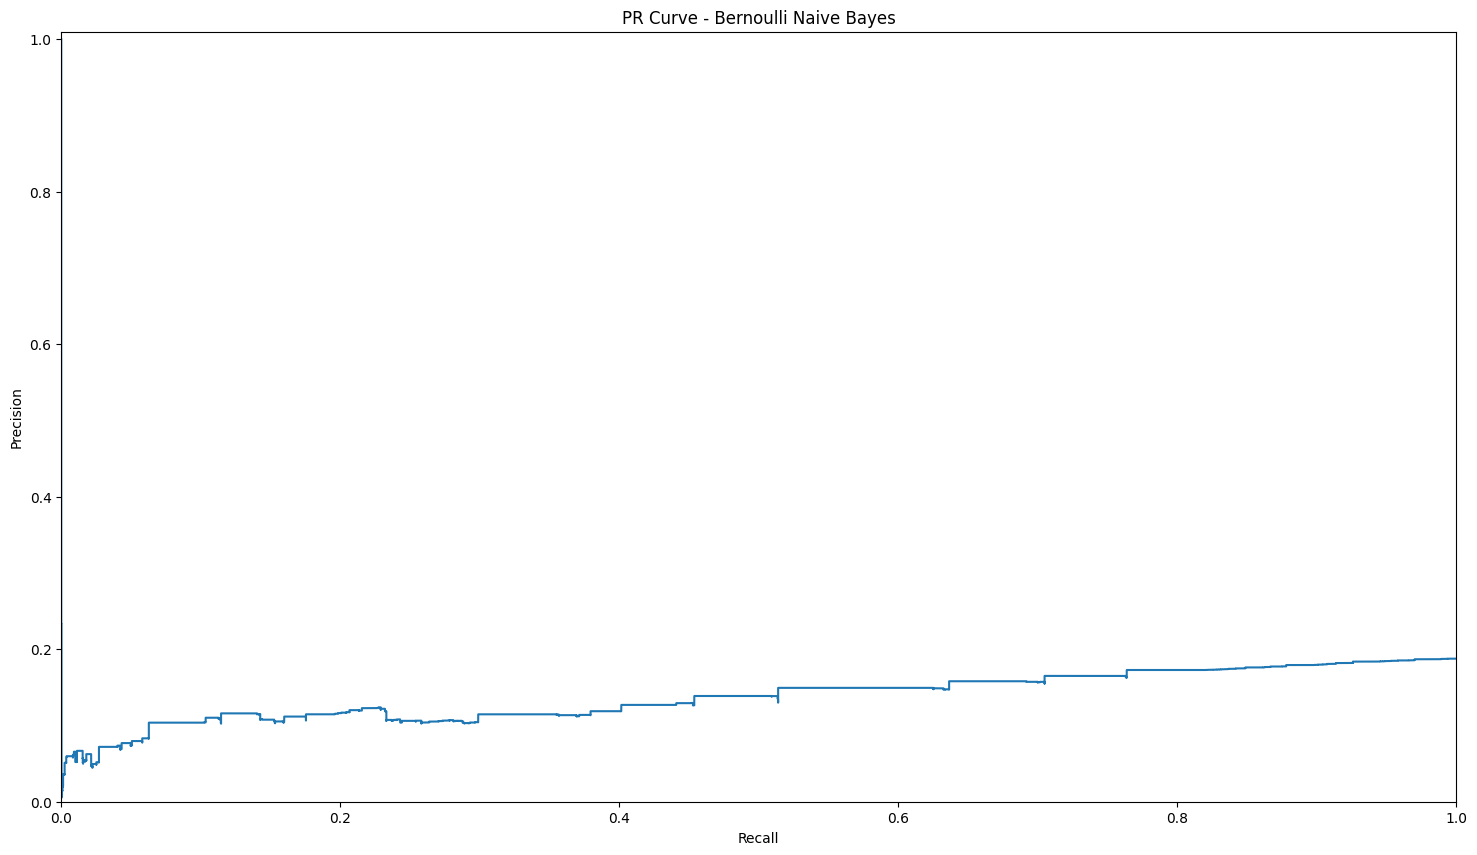

In [37]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])

y_score = bnb.predict_proba(X_validate)

precision["Bernoulli Naive Bayes"], recall["Bernoulli Naive Bayes"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(recall["Bernoulli Naive Bayes"], precision["Bernoulli Naive Bayes"], where="post")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.title("PR Curve - Bernoulli Naive Bayes")
plt.show()

### ROC curve - Bernoulli Naive Bayes

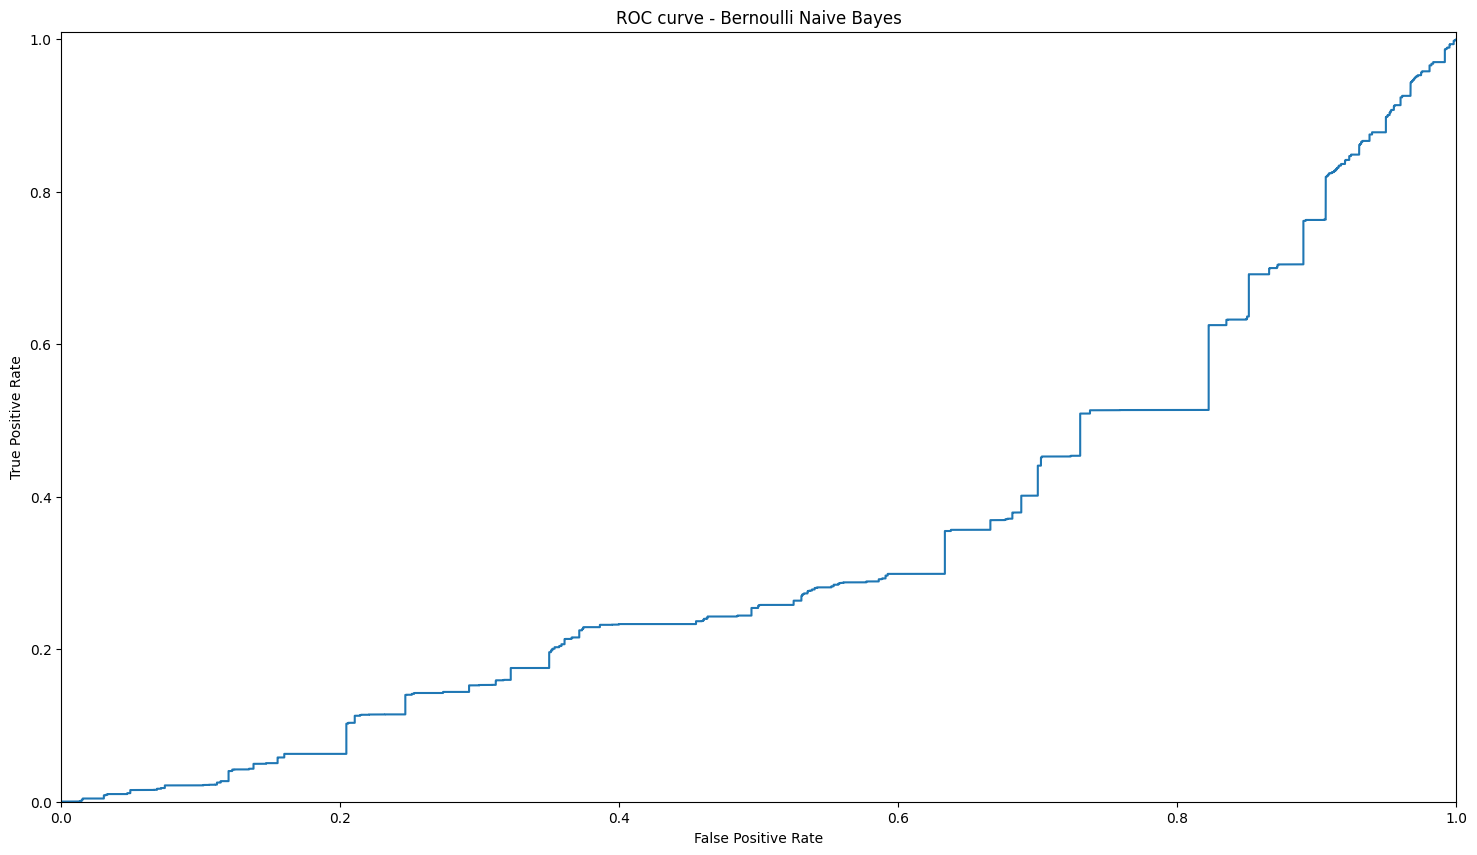

In [38]:
Y = label_binarize(y_validate, classes=[1, 2, 3, 4])
y_score = bnb.predict_proba(X_validate)

fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], _ = roc_curve(Y.ravel(), y_score.ravel())

plt.figure(figsize=(18, 10))
plt.step(fpr["Bernoulli Naive Bayes"], tpr["Bernoulli Naive Bayes"], where="post")

plt.title("ROC curve - Bernoulli Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0, 1])
plt.ylim([0, 1.01])
plt.show()